# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 2. Teorie - před odevzdáním prosíme smazat včetně ilustračních obrázků.

Pokud znáte základní teorii okolo EKG signálů, můžete tuhle část přeskočit. Teorie je doopravdy stručná, neboť teorie EKG není cílem tohoto předmětu.

EKG signál má několik základních částí:
  

1.   P vlnu, která značí počátek kontrakce předsíní
2.   QRS komplex vln, který vzniká depolarizací komor (jejich stažením)
3.   T vlna jako poslední představuje repolarizaci komor (tedy jejich zpětné roztažení)

Nás bude zajímat především QRS komplex, který se ve spektru nachází mezi 10 Hz a 20 Hz. Z polohy QRS lze určit RR interval - vzdálenost mezi jednotlivými R vlnami. RR interval je přímo spojený se srdečním tepem. Na obrázku spektra EKG signálu můžete také vidět, na kterých frekvencích se nachází P a T vlna, kterou my ale v projektu odfiltrujeme.

EKG se snímá v několika základních rozloženích elektrodových svodů. V nemocnici se potkáte nejčastěji s 12 svodovým EKG. V projektu dostanete jeden z těchto svodů.


#### Popis EKG





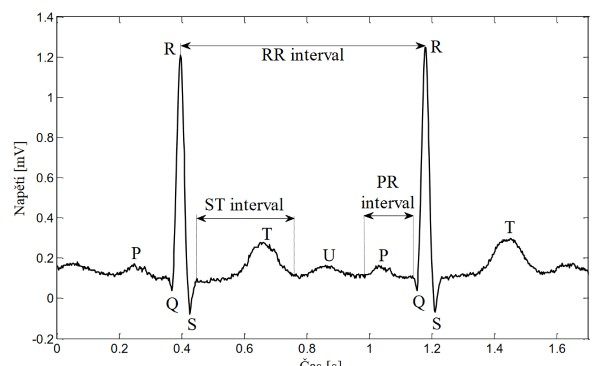

#### EKG ve spektru

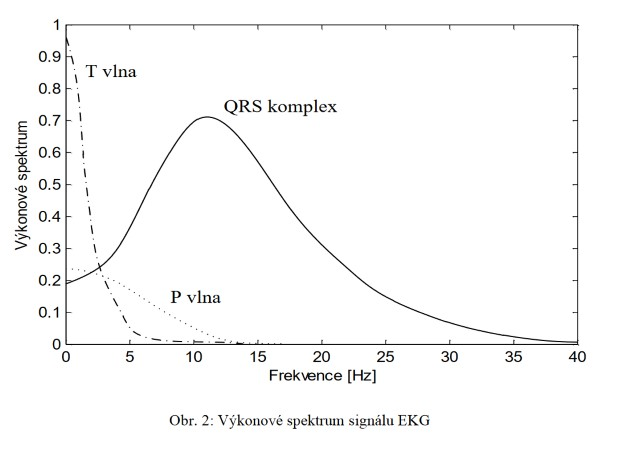

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [106]:
#Načtení Vašeho signálu - xmalus01 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xmalus01.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xmalus01.wav")


--2023-12-17 22:05:18--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xmalus01.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xmalus01.wav.3’

xmalus01.wav.3      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 22:05:19 (144 MB/s) - ‘xmalus01.wav.3’ saved [10044/10044]

--2023-12-17 22:05:19--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.2’

FIB.wav.2           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-1

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

In [103]:
import soundfile as sf
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, resample



# Nahrání signálu EKG ze souboru xmalus01.wav
file_path = 'xmalus01.wav'
data, sample_rate = sf.read(file_path)

# Vyber 5-sekundového úseku (např. od začátku)
start_time = 0  # Začátek vybraného úseku v sekundách
duration = 5    # Délka vybraného úseku v sekundách

start_sample = int(start_time * sample_rate)
end_sample = start_sample + int(duration * sample_rate)
selected_segment = data[start_sample:end_sample]


b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

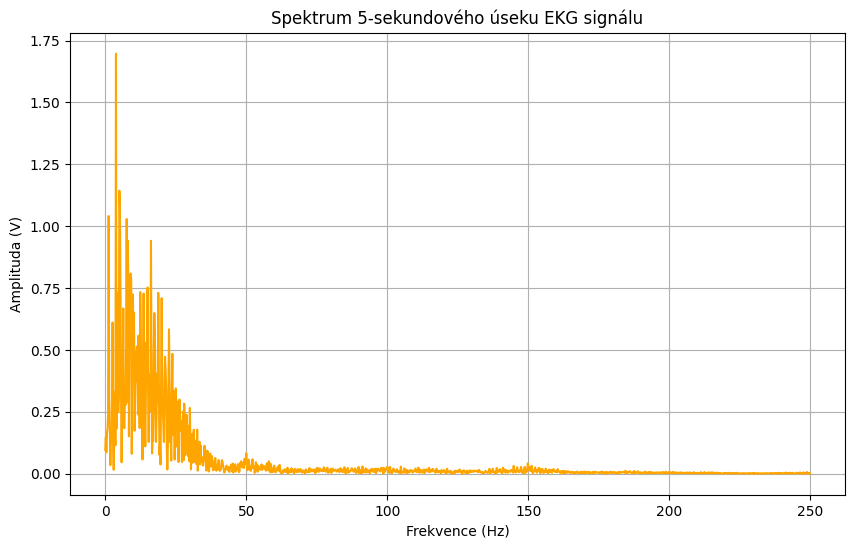

In [5]:
# Výpočet diskrétní Fourierovy transformace (DFT)
spectrum = np.fft.fft(selected_segment)
frequencies = np.fft.fftfreq(len(spectrum), d=1/sample_rate)

# Zobrazení spektra
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum)[:len(spectrum)//2], color='orange')
plt.title('Spektrum 5-sekundového úseku EKG signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda (V)')
plt.grid(True)
plt.show()

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.


Rušení na frekvencích 50 Hz nebo 60 Hz v signálu může být způsobeno elektrickým šumem, který je běžně spojen s elektrickou síťí.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

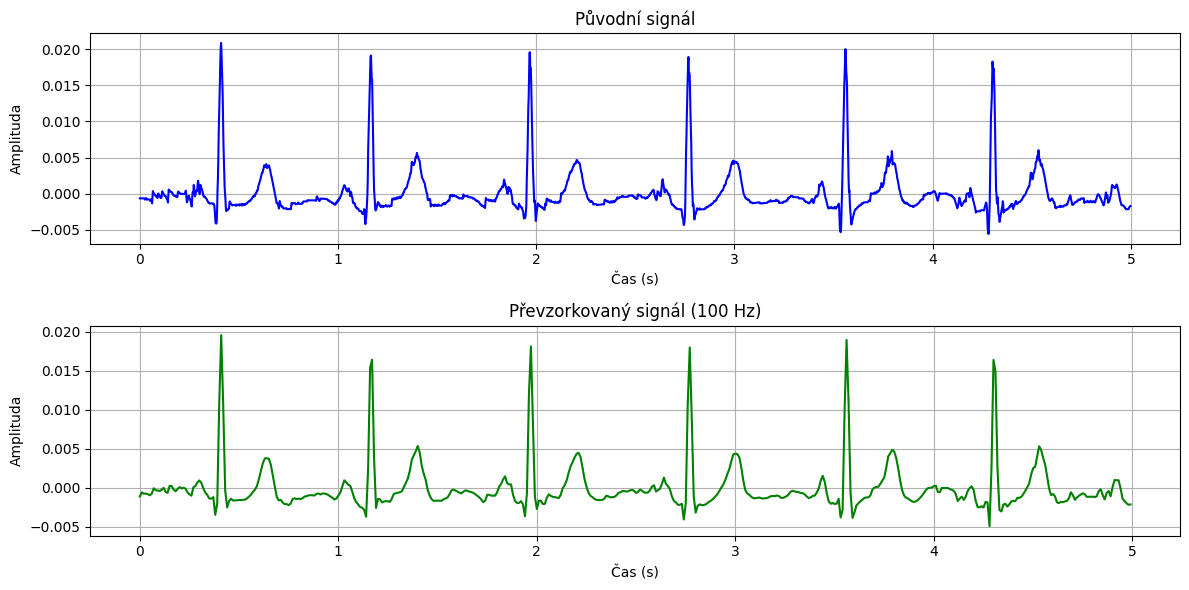

In [6]:
# Aplikace filtru pro antialiasing
cutoff_freq = 40  # Maximální frekvence signálu (Fs/2)
nyquist = 0.5 * sample_rate
normalized_cutoff = cutoff_freq / nyquist
b, a = signal.butter(4, normalized_cutoff, btype='low')
filtered_signal = signal.filtfilt(b, a, selected_segment)

# Převzorkování signálu na 100 Hz
new_sample_rate = 100
resampled_signal = signal.resample(filtered_signal, int(len(filtered_signal) * (new_sample_rate / sample_rate)))

# Vykreslení původního a převzorkovaného signálu
plt.figure(figsize=(12, 6))

# Původní signál
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, len(selected_segment)) / sample_rate, selected_segment, color='blue')
plt.title('Původní signál')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.grid(True)

# Převzorkovaný signál
plt.subplot(2, 1, 2)
plt.plot(np.arange(0, len(resampled_signal)) / new_sample_rate, resampled_signal, color='green')
plt.title('Převzorkovaný signál (100 Hz)')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()


b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

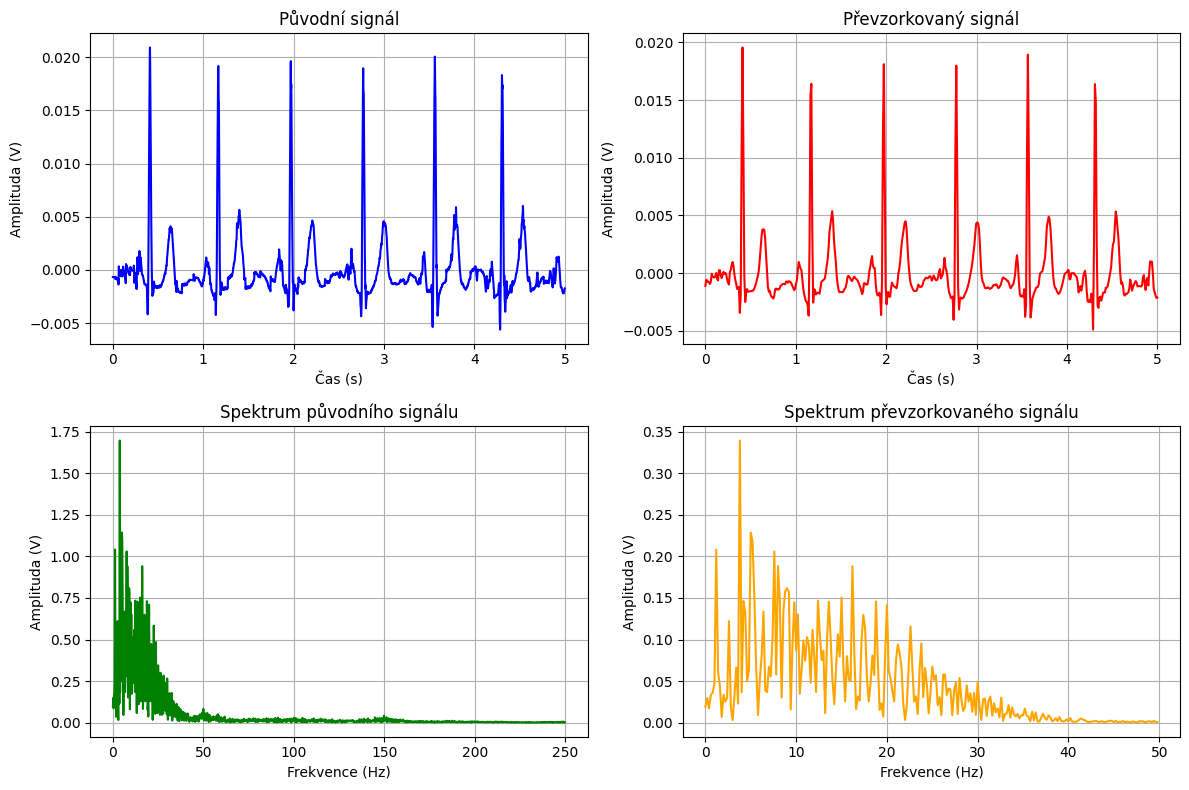

In [7]:
# Aplikace filtru dolní propusti pro antialiasing
cutoff_frequency = 40.0  # Hz - určení mezní frekvence pro filtr dolní propusti
normalized_cutoff = cutoff_frequency / (0.5 * sample_rate)
b, a = signal.butter(4, normalized_cutoff, btype='low')  # Návrh filtru

filtered_signal = signal.filtfilt(b, a, selected_segment)  # Aplikace filtru

# Převzorkování signálu na vzorkovací frekvenci 100 Hz
target_sample_rate = 100
resampled_signal = signal.resample(filtered_signal, int(len(filtered_signal) * target_sample_rate / sample_rate))

# Zobrazení původního a převzorkovaného signálu v časové doméně
time_axis_original = np.linspace(start_time, start_time + duration, len(selected_segment))
time_axis_resampled = np.linspace(start_time, start_time + duration, len(resampled_signal))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time_axis_original, selected_segment, color='blue')
plt.title('Původní signál')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda (V)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(time_axis_resampled, resampled_signal, color='red')
plt.title('Převzorkovaný signál')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda (V)')
plt.grid(True)

# Výpočet spektra původního signálu
spectrum_original = np.fft.fft(selected_segment)
frequencies_original = np.fft.fftfreq(len(spectrum_original), d=1/sample_rate)

# Výpočet spektra převzorkovaného signálu
spectrum_resampled = np.fft.fft(resampled_signal)
frequencies_resampled = np.fft.fftfreq(len(spectrum_resampled), d=1/target_sample_rate)

plt.subplot(2, 2, 3)
plt.plot(frequencies_original[:len(frequencies_original)//2], np.abs(spectrum_original)[:len(spectrum_original)//2], color='green')
plt.title('Spektrum původního signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda (V)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(frequencies_resampled[:len(frequencies_resampled)//2], np.abs(spectrum_resampled)[:len(spectrum_resampled)//2], color='orange')
plt.title('Spektrum převzorkovaného signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda (V)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

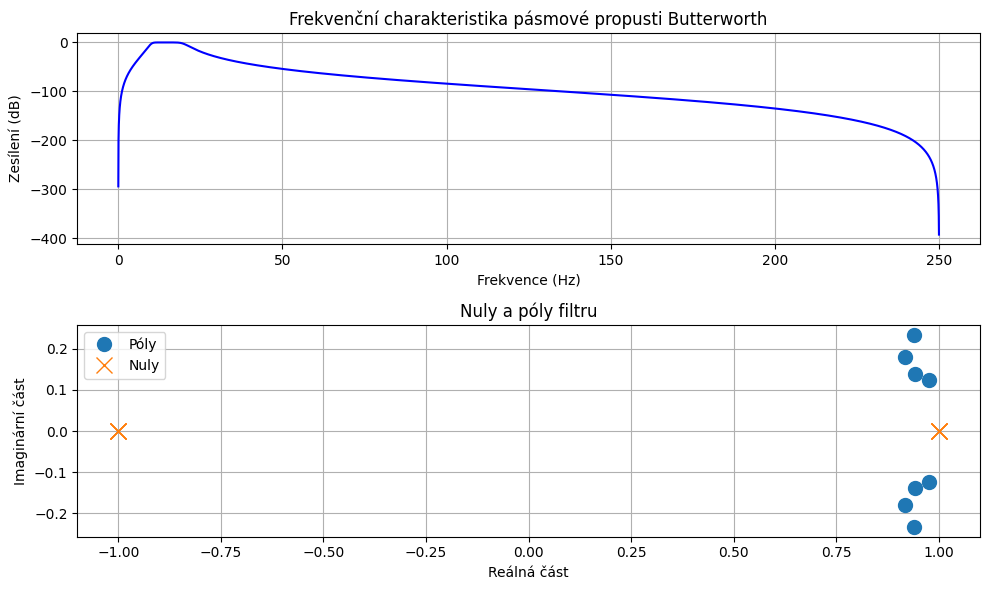

In [76]:
lowcut = 10  # Dolní mezní frekvence
highcut = 20  # Horní mezní frekvence
order = 4  # Řád filtru

nyquist = 0.5 * sample_rate
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')

# Zobrazení frekvenční charakteristiky filtru
w, h = signal.freqz(b, a, worN=8000)
frequencies = (sample_rate * 0.5 / np.pi) * w

plt.figure(figsize=(10, 6))

# Amplitudová frekvenční charakteristika
plt.subplot(2, 1, 1)
plt.plot(frequencies, 20 * np.log10(abs(h)), 'b')
plt.title('Frekvenční charakteristika pásmové propusti Butterworth')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Zesílení (dB)')
plt.grid(True)

# Zobrazení nul a pólů
plt.subplot(2, 1, 2)
plt.plot(np.real(np.roots(a)), np.imag(np.roots(a)), 'o', markersize=10, label='Póly')
plt.plot(np.real(np.roots(b)), np.imag(np.roots(b)), 'x', markersize=12, label='Nuly')
plt.title('Nuly a póly filtru')
plt.xlabel('Reálná část')
plt.ylabel('Imaginární část')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
# Vytvoření spektrální masky pro pásmovou propust
def bandpass_mask(frequencies, lowcut, highcut, sample_rate):
    mask = np.ones(len(frequencies))
    mask[(frequencies < lowcut)] = 0
    mask[(frequencies > highcut)] = 0
    return mask

# Výpočet FFT signálu
fft_data = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(fft_data), d=1/sample_rate)

# Vytvoření spektrální masky pro pásmovou propust 10-20 Hz
mask = bandpass_mask(frequencies, 10, 20, sample_rate)

# Filtrování signálu ve frekvenční doméně
filtered_fft = fft_data * mask

# Inverzní FFT pro získání filtrovaného signálu
filtered_signal = np.fft.ifft(filtered_fft)

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


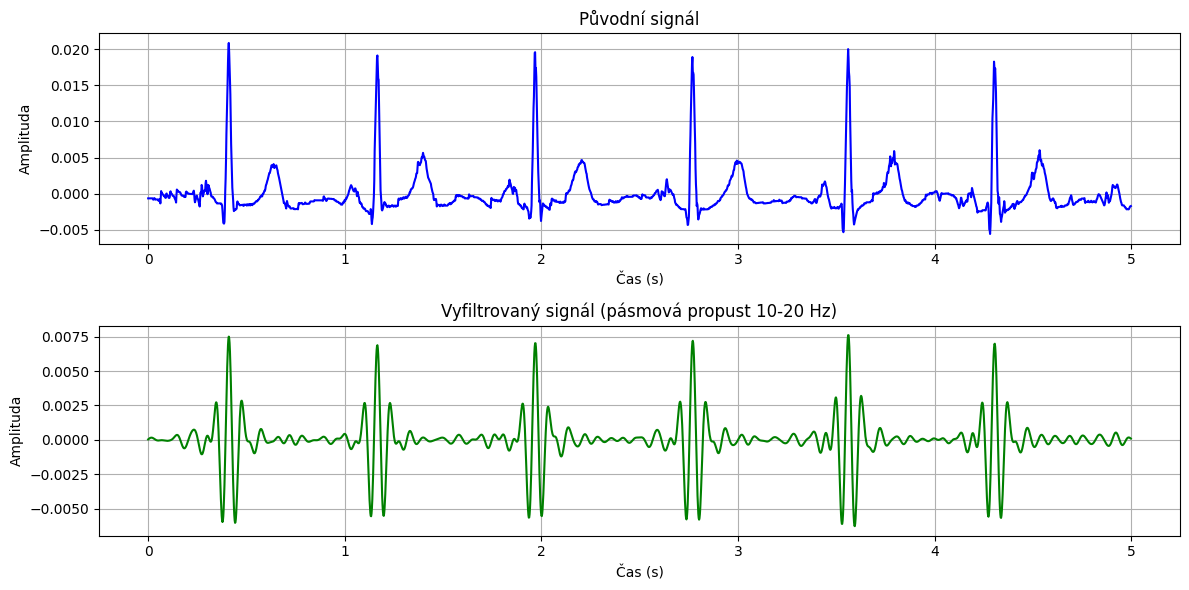

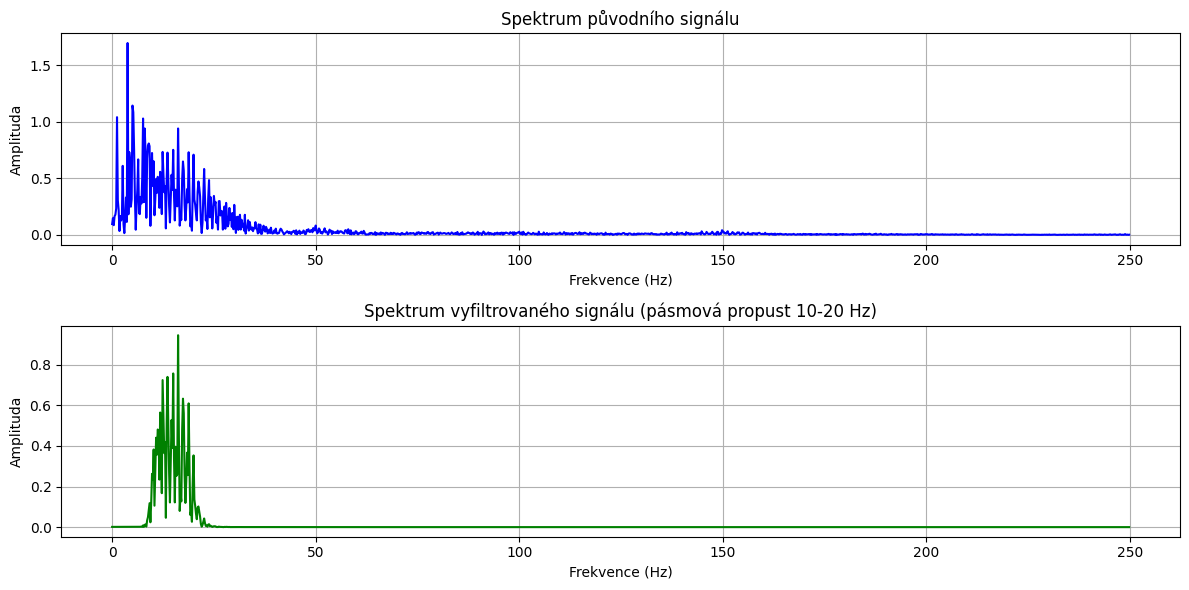

In [77]:
# Aplikace filtru z obou stran (filtfilt)
filtered_signal = signal.filtfilt(b, a, selected_segment)

time_axis_original = np.arange(0, len(selected_segment)) / sample_rate
time_axis_filtered = np.arange(0, len(filtered_signal)) / sample_rate

plt.figure(figsize=(12, 6))

# Původní signál
plt.subplot(2, 1, 1)
plt.plot(time_axis_original, selected_segment, color='blue')
plt.title('Původní signál')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.grid(True)

# Vyfiltrovaný signál
plt.subplot(2, 1, 2)
plt.plot(time_axis_filtered, filtered_signal, color='green')
plt.title('Vyfiltrovaný signál (pásmová propust 10-20 Hz)')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

# Výpočet a zobrazení spekter
# Spektrum původního signálu
spectrum_original = np.fft.fft(selected_segment)
frequencies_original = np.fft.fftfreq(len(spectrum_original), d=1/sample_rate)

# Spektrum vyfiltrovaného signálu
spectrum_filtered = np.fft.fft(filtered_signal)
frequencies_filtered = np.fft.fftfreq(len(spectrum_filtered), d=1/sample_rate)

plt.figure(figsize=(12, 6))

# Spektrum původního signálu
plt.subplot(2, 1, 1)
plt.plot(frequencies_original[:len(frequencies_original)//2], np.abs(spectrum_original)[:len(spectrum_original)//2], color='blue')
plt.title('Spektrum původního signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.grid(True)

# Spektrum vyfiltrovaného signálu
plt.subplot(2, 1, 2)
plt.plot(frequencies_filtered[:len(frequencies_filtered)//2], np.abs(spectrum_filtered)[:len(spectrum_filtered)//2], color='green')
plt.title('Spektrum vyfiltrovaného signálu (pásmová propust 10-20 Hz)')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?




Časová doména:
-Nefiltrovaný signál: Může obsahovat různé šumy, frekvenční složky mimo zájem odběratele.

-Filtrovaný signál: Měl by obsahovat zvýrazněné složky v pásmu mezi 40-100 Hz a snížený šum a složky mimo toto pásmo. Ideálně by měl být čistší a obsahovat méně nežádoucích frekvenčních složek.

Spektrum signálu:
-Spektrum nefiltrovaného signálu: Bude obsahovat všechny frekvenční složky obsažené v signálu, včetně šumu a složek mimo zájem odběratele.

-Spektrum filtrovaného signálu: Mělo by ukázat zvýrazněné složky v pásmu 40-100 Hz a snížené složky mimo toto pásmo, což by mělo vést k čistějšímu spektru s méně rušivými složkami.


Největší možný fázový posun při použití jednostranného filtru odpovídá zpoždění filtru v počtu vzorků. To znamená, že teoreticky může dojít k posunu o až polovinu délky filtru ve vzorcích.


### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

Příklad zakreslené detekce (před odevzdáním smažte):

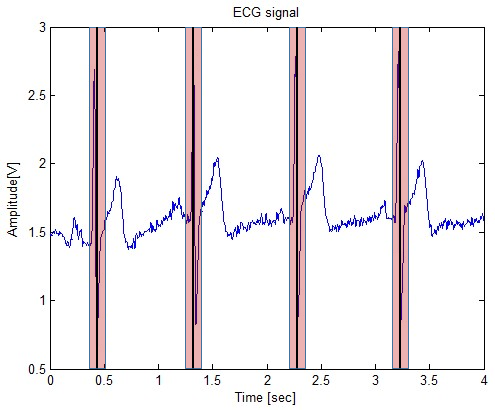

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

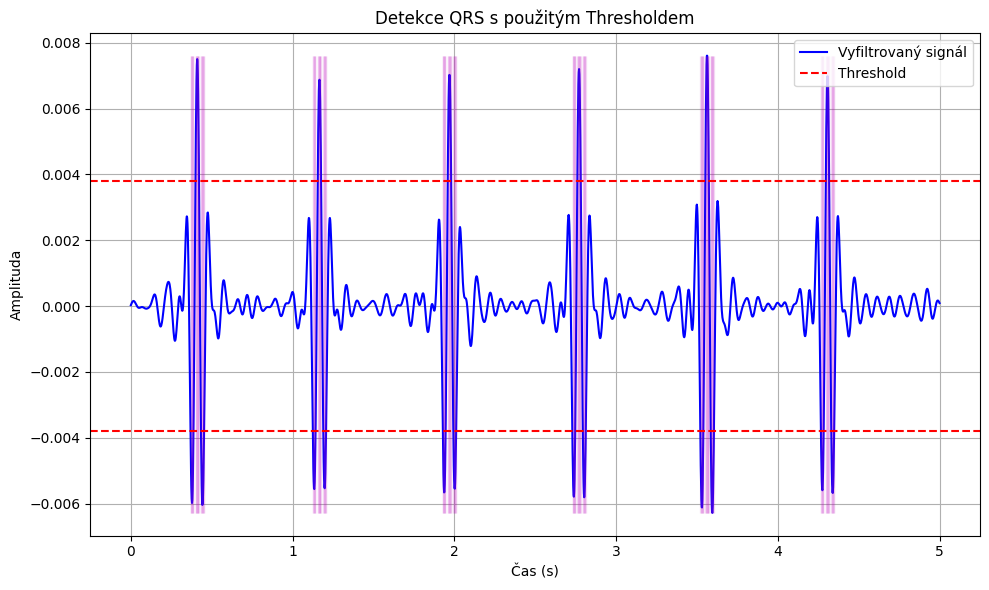

In [78]:
# Detekce QRS pomocí prahu (threshold)
max_amplitude = np.max(np.abs(filtered_signal))  # Maximální amplituda v signálu
threshold_percentage = 0.5  # Procento maximální amplitudy pro stanovení prahu
threshold = threshold_percentage * max_amplitude

# Hledání indexů, kde je signál vyšší než stanovený prah (QRS detekce)
QRS_indices = np.where(filtered_signal > threshold)[0]
QRS_indices_low = np.where(filtered_signal < -threshold)[0]

# Vykreslení signálu s detekcemi QRS a použitým thresholdem
time_axis = np.linspace(start_time, start_time + duration, len(filtered_signal))

plt.figure(figsize=(10, 6))
plt.plot(time_axis, filtered_signal, label='Vyfiltrovaný signál', color='blue')
plt.vlines(time_axis[QRS_indices], ymin=np.min(filtered_signal), ymax=np.max(filtered_signal), color='m', linewidth=1, alpha=0.1)
plt.vlines(time_axis[QRS_indices_low], ymin=np.min(filtered_signal), ymax=np.max(filtered_signal), color='m', linewidth=1, alpha=0.1)
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='red', linestyle='--')

plt.title('Detekce QRS s použitým Thresholdem')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

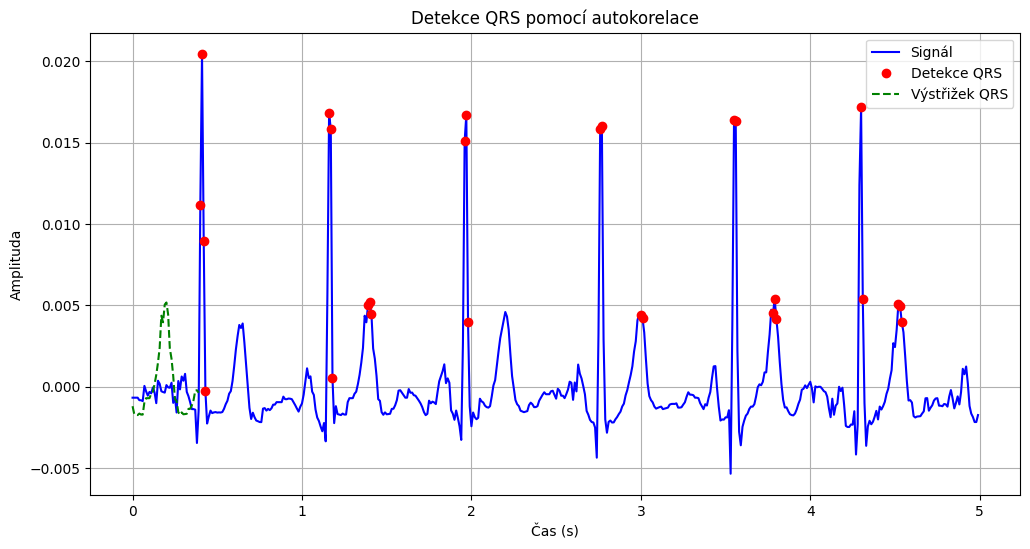

In [79]:
new_sample_rate = 100
resampled_signal = np.interp(np.linspace(0, 1, int(len(selected_segment) * (new_sample_rate / sample_rate))),
                             np.linspace(0, 1, len(selected_segment)), selected_segment)

# Získání vzorku jednoho QRS ze signálu
# Pro jednoduchost vezmeme úsek, kde je očekáváno QRS komplex
QRS_sample = resampled_signal[int(1.2 * new_sample_rate):int(1.6 * new_sample_rate)]

# Autokorelace signálu s QRS vzorkem
autocorr = np.correlate(resampled_signal, QRS_sample, mode='same')

# Detekce QRS na základě vysokých hodnot autokorelace
threshold = 0.8 * np.max(autocorr)  # Stanovení prahové hodnoty
QRS_locations = np.where(autocorr > threshold)[0]

# Vykreslení signálu s detekcemi QRS a označeným QRS vzorkem
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(resampled_signal)) / new_sample_rate, resampled_signal, color='blue', label='Signál')
plt.plot(QRS_locations / new_sample_rate, resampled_signal[QRS_locations], 'ro', label='Detekce QRS')
plt.plot(np.arange(len(QRS_sample)) / new_sample_rate, QRS_sample, 'g--', label='Výstřižek QRS')
plt.title('Detekce QRS pomocí autokorelace')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

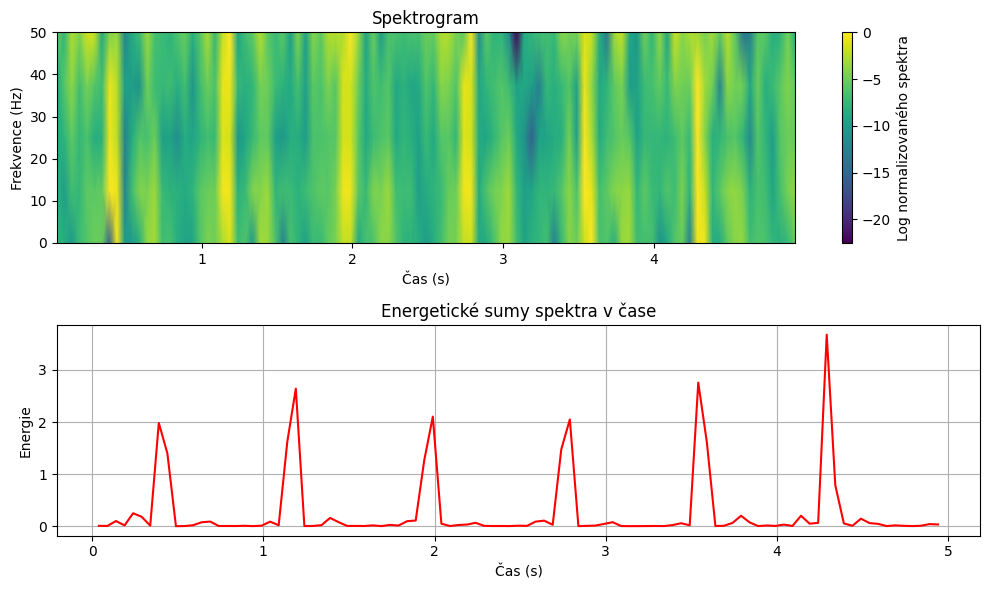

In [80]:
# Vytvoření spektrogramu s požadovanými parametry
window_len = int(0.085 * target_sample_rate)  # Délka okna (200 ms)
hop_size = int(0.032 * target_sample_rate)   # Velikost skoku (120 ms)

frequencies, times, spectrogram = signal.spectrogram(resampled_signal, fs=target_sample_rate,
                                                    window='hann', nperseg=window_len, noverlap=hop_size)

# Normalizace spektrogramu v čase
normalized_spectrogram = spectrogram / np.max(spectrogram, axis=1)[:, None]

# Výpočet sumy energie pro jednotlivé časové biny
energy_sum = np.sum(normalized_spectrogram, axis=0)

# Vykreslení spektrogramu a energetických sum
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies, np.log(normalized_spectrogram), shading='gouraud')
plt.title('Spektrogram')
plt.ylabel('Frekvence (Hz)')
plt.xlabel('Čas (s)')
plt.colorbar().set_label('Log normalizovaného spektra')

plt.subplot(2, 1, 2)
plt.plot(times, energy_sum, color='red')
plt.title('Energetické sumy spektra v čase')
plt.xlabel('Čas (s)')
plt.ylabel('Energie')
plt.grid(True)

plt.tight_layout()
plt.show()

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

Mělo by to vypadat přibližně takto (před odevzdáním smažte):

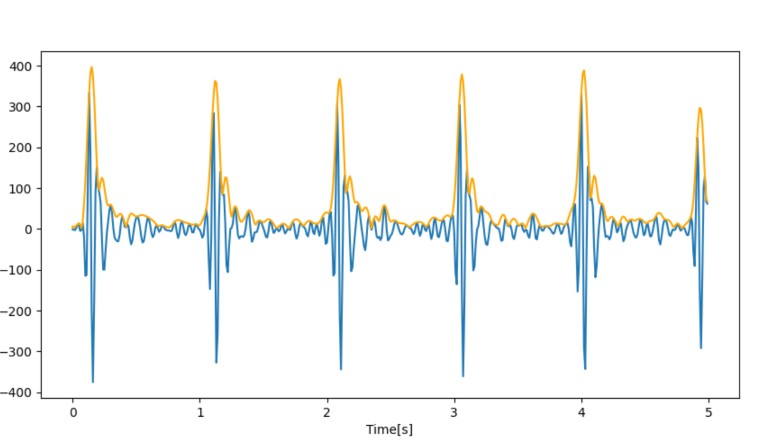

Detekci QRS poté provedete opět prahováním, tentokrát ale obálky signálu.


Při této úloze **nepoužívejte** funkci hilbert z knihovny scipy. Cílem je, abyste si ji napsali sami. Můžete ji použít pouze jako baseline pro porovnání vašich výsledků.



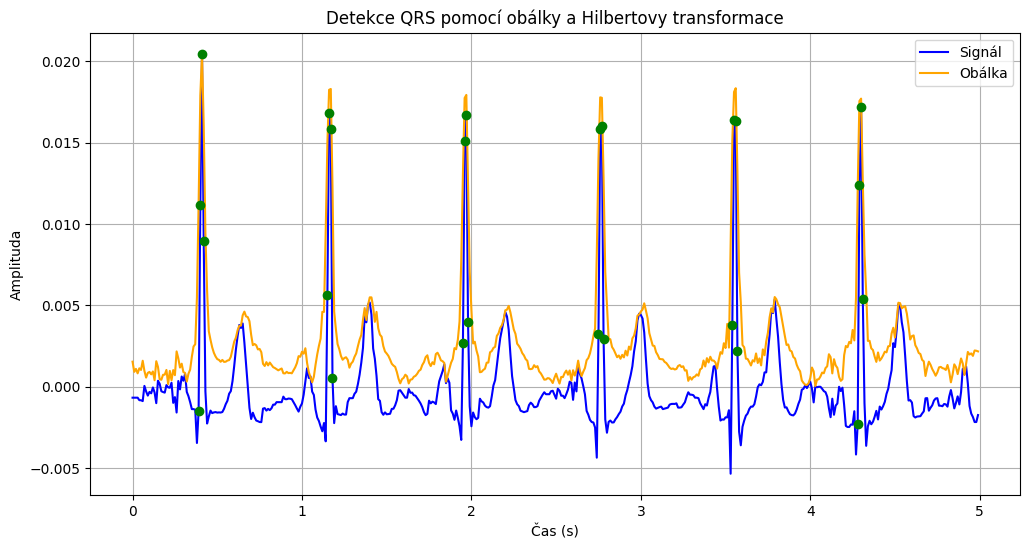

In [81]:
new_sample_rate = 100
resampled_signal = np.interp(np.linspace(0, 1, int(len(selected_segment) * (new_sample_rate / sample_rate))),
                             np.linspace(0, 1, len(selected_segment)), selected_segment)

# Funkce pro výpočet Hilbertovy transformace
def hilbert_transform(signal):
    # Fourierova transformace signálu
    fft_signal = np.fft.fft(signal)

    # Vynulování pravé symetrické části spektra
    if len(fft_signal) % 2 == 0:
        fft_signal[len(fft_signal) // 2:] = 0
    else:
        fft_signal[(len(fft_signal) + 1) // 2:] = 0

    # Úprava levé části spektra
    if len(fft_signal) % 2 == 0:
        fft_signal[1:(len(fft_signal) // 2)] *= 2
    else:
        fft_signal[1:((len(fft_signal) + 1) // 2)] *= 2

    # Zpětná Fourierova transformace
    hilbert = np.fft.ifft(fft_signal)
    return np.abs(hilbert)

# Výpočet obálky signálu pomocí Hilbertovy transformace
envelope = hilbert_transform(resampled_signal)

# Detekce QRS pomocí prahování obálky signálu
threshold = 0.5 * np.max(envelope)  # Stanovení prahové hodnoty
QRS_locations = np.where(envelope > threshold)[0]

# Vykreslení signálu a obálky s označenými QRS detekcemi
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(resampled_signal)) / new_sample_rate, resampled_signal, color='blue', label='Signál')
plt.plot(np.arange(0, len(envelope)) / new_sample_rate, envelope, color='orange', label='Obálka')
plt.plot(QRS_locations / new_sample_rate, resampled_signal[QRS_locations], 'go')
plt.title('Detekce QRS pomocí obálky a Hilbertovy transformace')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

*Zde napište vaše řešení.*

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

Mělo by to vypadat přibližně takto (před odevzdáním smažte):
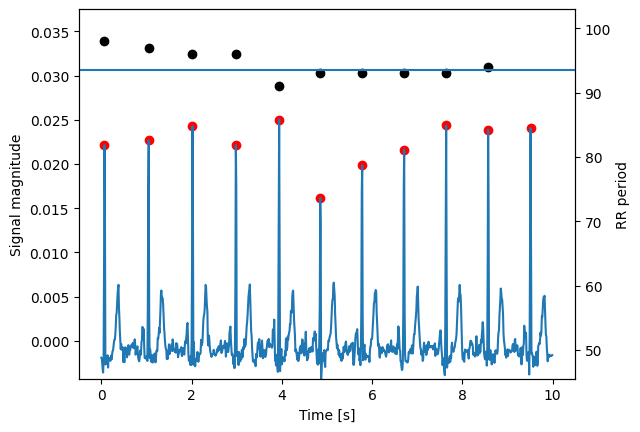

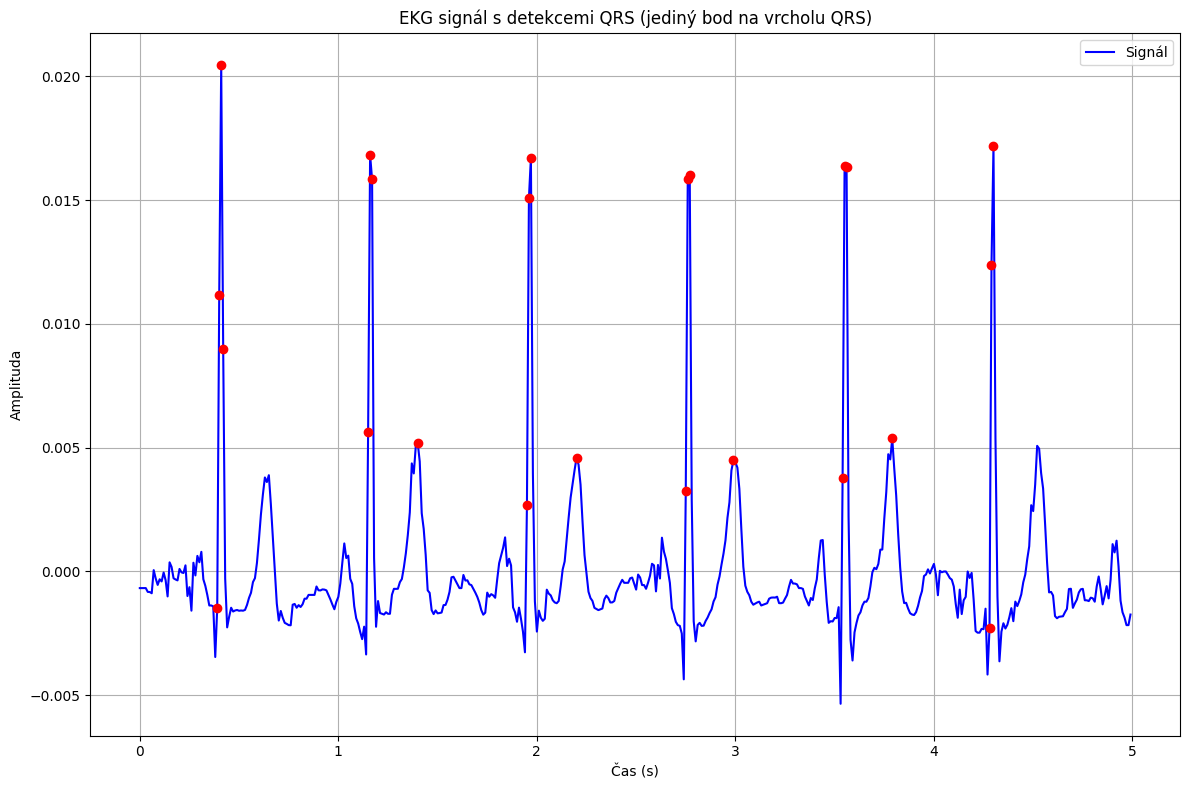

In [94]:
RR_intervals = np.diff(QRS_locations) / new_sample_rate  # Vypočítání rozdílu mezi QRS v sekundách

# Vykreslení EKG signálu s detekcemi QRS a R-R intervaly nad QRS
plt.figure(figsize=(12, 8))

# EKG signál s detekcemi QRS
plt.plot(np.arange(0, len(resampled_signal)) / new_sample_rate, resampled_signal, color='blue', label='Signál')

# R-R intervaly nad QRS detekcemi
for i, RR in enumerate(RR_intervals):
    max_index = QRS_locations[i] + np.argmax(resampled_signal[QRS_locations[i]:QRS_locations[i + 1]])
    plt.plot(max_index / new_sample_rate, resampled_signal[max_index], 'ro')

plt.title('EKG signál s detekcemi QRS (jediný bod na vrcholu QRS)')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [110]:
# Nahrání signálu ze souboru FIB.wav
fs, signal_data = wavfile.read('FIB.wav')

# Filtrace signálu - například Butterworthův filtr
cutoff = 50  # Cutoff frekvence pro filtraci
order = 4  # Řád filtru
b, a = signal.butter(order, cutoff / (fs / 2), 'low')
filtered_signal = signal.filtfilt(b, a, signal_data)

# Převzorkování signálu - příklad z 1000 Hz na 500 Hz
new_fs = 500  # Nová vzorkovací frekvence
resampled_signal = signal.resample(filtered_signal, int(len(filtered_signal) * (new_fs / fs)))

# Vizualizace signálu
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(signal_data, label='Původní signál')
plt.title('Původní signál')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(filtered_signal, label='Filtrovaný signál')
plt.title('Filtrovaný signál')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(resampled_signal, label='Převzorkovaný signál')
plt.title('Převzorkovaný signál')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.legend()

plt.tight_layout()
plt.show()

AttributeError: ignored

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód